In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram

from sklearn.metrics.pairwise import euclidean_distances

np.set_printoptions(suppress=True) # Avoid the numbers in exponent form

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('customer.csv')

In [4]:
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [5]:
# Visualize 
cols = ['Yearly_Income','Age','Cust_Spend_Score']

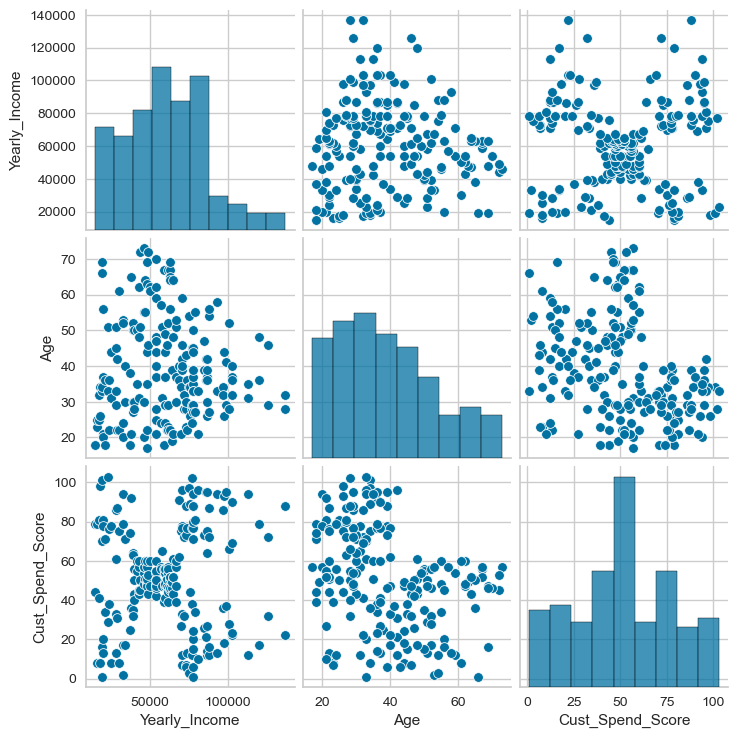

In [6]:
sns.pairplot(data[cols])
plt.show()

In [7]:
# In Cust_Spend_Score and Yearly_income we can cleary see some groups or the clusters in the 
# data are forming. We can use these two columns and use K-means clustering. 

In [8]:
data_c = data[['Yearly_Income','Cust_Spend_Score']]
data_c

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41
...,...,...
195,120000,79
196,126000,32
197,126000,72
198,137000,22


In [9]:
# We need to scale the data before clustering
sc = StandardScaler()

In [10]:
data_c = sc.fit_transform(data_c)
data_c = pd.DataFrame(data_c,
                      columns=['Yearly_Income','Cust_Spend_Score'])

In [11]:
data_c.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


### K-Means Clustering

In [12]:
# We need to identify the value of k
# Elbow plot 
# Silhoette Score 

In [13]:
n_clus = [2,3,4,5,6,7,8]

In [14]:
wcss = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data_c)
    wcss.append(model.inertia_)

In [15]:
wcss

[269.6968358539574,
 158.57318648271084,
 110.04055917371358,
 66.69647392440947,
 56.18463751148981,
 45.54724874614021,
 38.73340573718309]

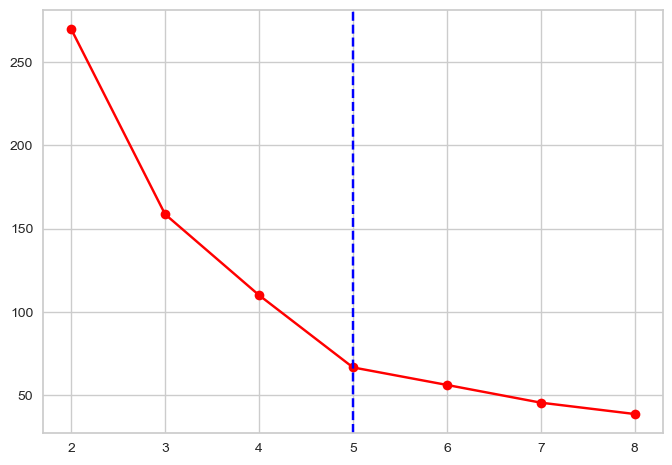

In [16]:
# Elbow plot
plt.plot(n_clus,wcss,color = 'red', marker = 'o')
plt.axvline(x=5,color='blue',ls='--')
plt.xticks(n_clus)
plt.show()

In [17]:
# There is another way to drow this scree plot/ elbow plot by using yellowbrick library

In [18]:
k_elbow = KElbowVisualizer(KMeans(),k=8)

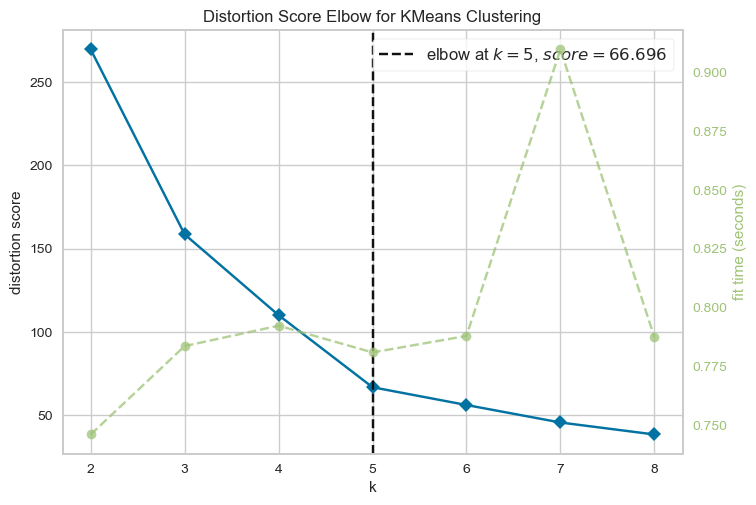

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
k_elbow.fit(data_c)
k_elbow.show()

In [20]:
# Use the Silhoette Score to identify the value of k

In [21]:
sil_score = []

for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data_c)
    pred = model.predict(data_c)
    sil_score.append(silhouette_score(data_c,pred))

In [22]:
sil_score

[0.2907934008243553,
 0.4655232553320422,
 0.4953283597895246,
 0.5520621436364275,
 0.5400545310397922,
 0.5301955242744942,
 0.4535854698873939]

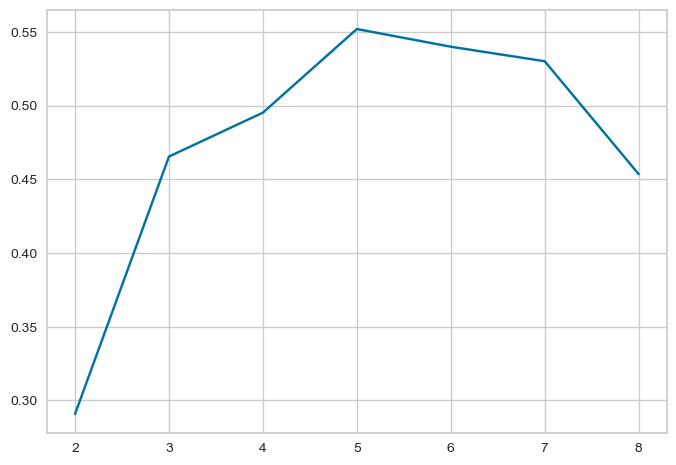

In [23]:
plt.plot(n_clus,sil_score)
plt.show()

In [24]:
# Better way to visualize the silhouette score is by using yellow brick

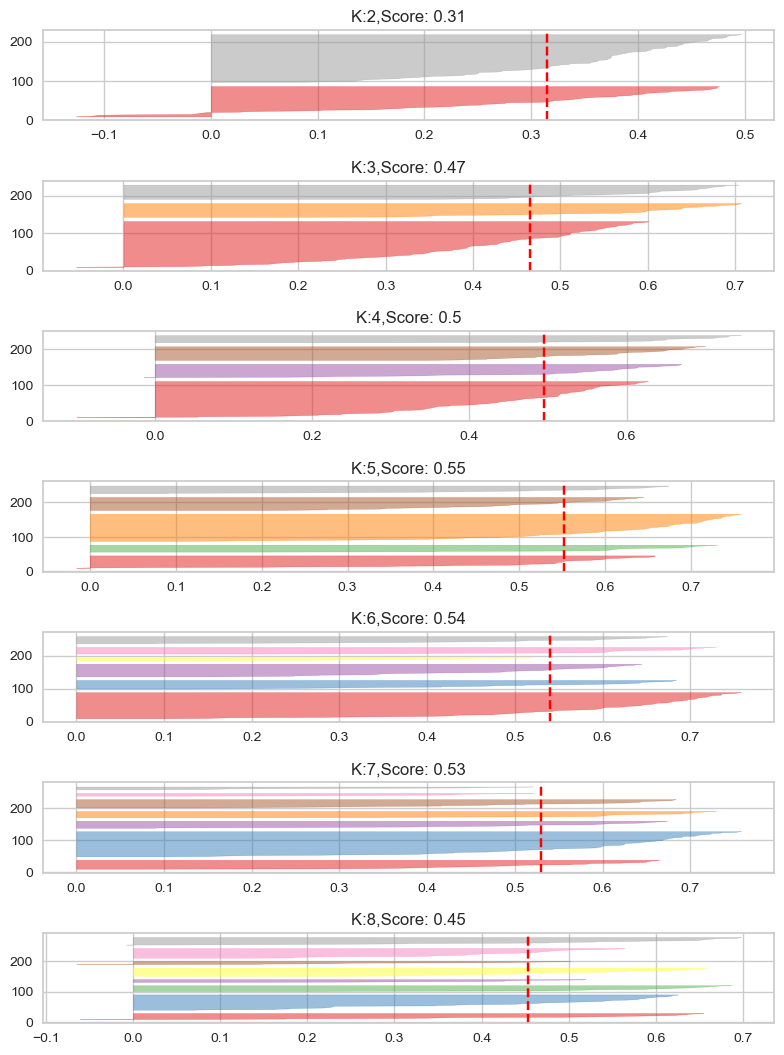

In [25]:
plt.figure(figsize=([8,12]))
t=1
for i in n_clus:
    plt.subplot(8,1,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_c)
    plt.title(f'K:{i},Score: {np.round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [26]:
# As per K elbow plot and silhouette vizualiser k = 5 is the best value of k for clusters.
# So we will create a model with k = 5 

In [27]:
final_model = KMeans(n_clusters=5)

In [28]:
final_model.fit(data_c)

KMeans(n_clusters=5)

In [29]:
data['K_means_pred']=final_model.predict(data_c)

In [30]:
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex,K_means_pred
0,CUSTID1,15000,18,44,0,3
1,CUSTID2,15000,18,79,0,4
2,CUSTID3,16000,23,8,1,3
3,CUSTID4,16000,25,79,1,4
4,CUSTID5,17000,32,41,1,3
...,...,...,...,...,...,...
195,CUSTID196,120000,36,79,1,2
196,CUSTID197,126000,46,32,1,0
197,CUSTID198,126000,29,72,0,2
198,CUSTID199,137000,32,22,0,0


In [31]:
data['K_means_pred'].value_counts()

K_means_pred
1    80
2    39
0    37
3    23
4    21
Name: count, dtype: int64

In [32]:
centroids = final_model.cluster_centers_

In [33]:
centroids

array([[ 1.02054738, -1.24685589],
       [-0.22414997, -0.00693126],
       [ 0.99158305,  1.23437568],
       [-1.30751869, -1.12631231],
       [-1.35366972,  1.16441429]])

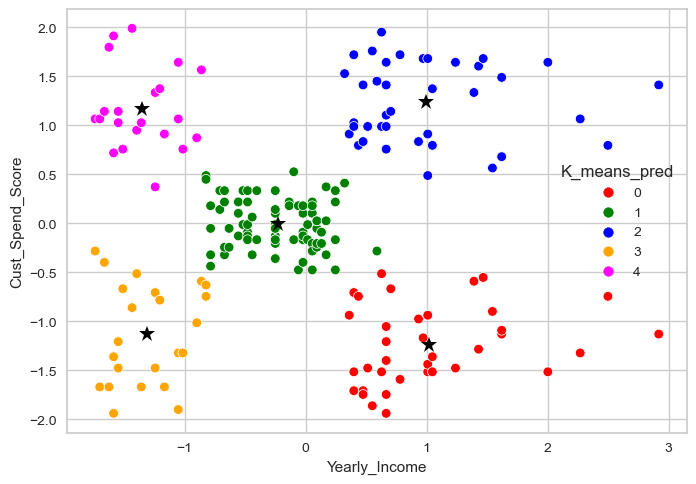

In [34]:
# Visualise the clusters
sns.scatterplot(x=data_c['Yearly_Income'],
                y=data_c['Cust_Spend_Score'],
                hue = data['K_means_pred'],
               palette=['red','green','blue','orange','magenta'])
for i in range(5):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

In [35]:
# data.groupby(by = 'K_means_pred').mean()[['Yearly_Income','Age','Cust_Spend_Score']]

## Aggloromative clustering

In [36]:
# Lets create a linkage matrix 
link_mat = linkage(data_c,method='complete')

In [37]:
link_mat.shape

(199, 4)

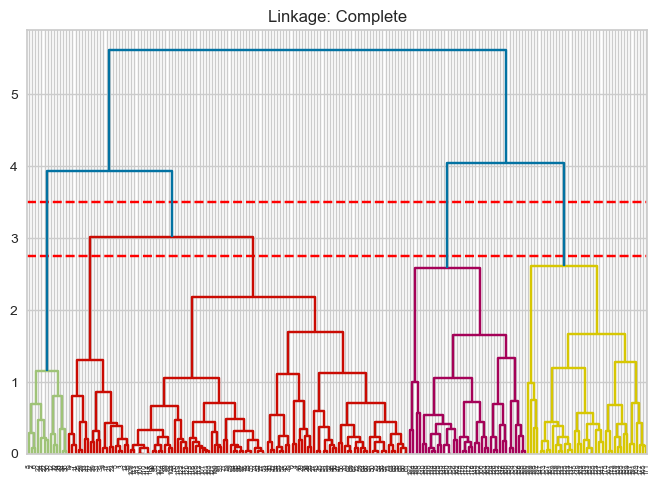

In [38]:
# Dendrogram
plt.title('Linkage: Complete')
plt.axhline(y=3.5,ls='--',color='red')
plt.axhline(y=2.75,ls='--',color='red')
dendrogram(link_mat)
plt.show()

In [39]:
# As per this horizontal line the correct value of k can be 4 or 5, so we can use 
# silhouette score to select the k.

In [55]:
for i in [4,5,6]:
    model = AgglomerativeClustering(n_clusters=i,linkage='complete')
    pred = model.fit_predict(data_c)
    print('K:',i,'Silhouette Score:',silhouette_score(data_c,pred))

K: 4 Silhouette Score: 0.4757458962705223
K: 5 Silhouette Score: 0.5243815304572439
K: 6 Silhouette Score: 0.5122458520619085


In [41]:
# Cophenetic Correlation coeff
# It is the correlation between cophenetic distance (Dendrogram Distance)
# and the actual distance

In [42]:
dist_matrix = euclidean_distances(data_c)
dist_matrix

array([[0.        , 1.34774417, 1.38677653, ..., 4.3718458 , 4.73310129,
        4.95532591],
       [1.34774417, 0.        , 2.73426174, ..., 4.24537243, 5.14802433,
        4.66954865],
       [1.38677653, 2.73426174, 0.        , ..., 4.86847521, 4.64985775,
        5.55161139],
       ...,
       [4.3718458 , 4.24537243, 4.86847521, ..., 0.        , 1.97059726,
        0.74557298],
       [4.73310129, 5.14802433, 4.64985775, ..., 1.97059726, 0.        ,
        2.54146043],
       [4.95532591, 4.66954865, 5.55161139, ..., 0.74557298, 2.54146043,
        0.        ]])

In [43]:
dist_matrix.shape

(200, 200)

In [44]:
actual_dist = dist_matrix[np.triu_indices(200,k=1)]

In [45]:
actual_dist.shape

(19900,)

In [46]:
# Cophenetic distance dendrogram
ccc, cophenetic_dist = cophenet(link_mat,actual_dist)

In [47]:
cophenetic_dist.shape

(19900,)

In [48]:
np.corrcoef(actual_dist,cophenetic_dist)

array([[1.        , 0.65874507],
       [0.65874507, 1.        ]])

In [49]:
ccc

0.6587450690038021

In [50]:
agglo_final = AgglomerativeClustering(n_clusters=5)

In [51]:
data ['Agglo_pred'] = agglo_final.fit_predict(data_c)

In [52]:
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex,K_means_pred,Agglo_pred
0,CUSTID1,15000,18,44,0,3,4
1,CUSTID2,15000,18,79,0,4,3
2,CUSTID3,16000,23,8,1,3,4
3,CUSTID4,16000,25,79,1,4,3
4,CUSTID5,17000,32,41,1,3,4
...,...,...,...,...,...,...,...
195,CUSTID196,120000,36,79,1,2,1
196,CUSTID197,126000,46,32,1,0,0
197,CUSTID198,126000,29,72,0,2,1
198,CUSTID199,137000,32,22,0,0,0


In [53]:
data['Agglo_pred'].value_counts()

Agglo_pred
2    88
1    39
0    32
3    21
4    20
Name: count, dtype: int64

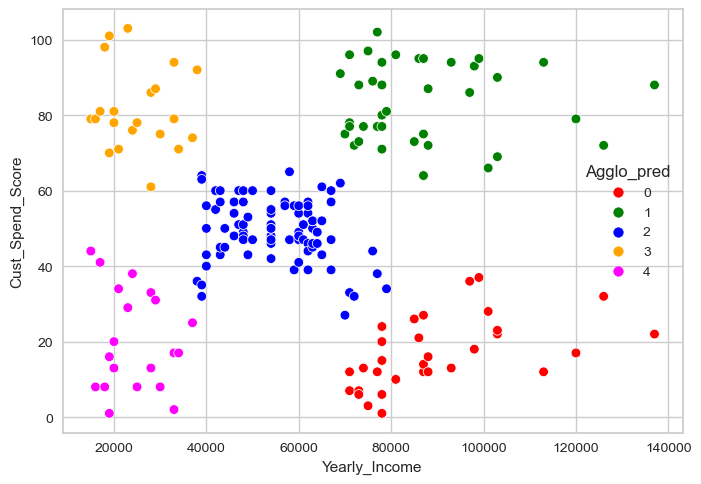

In [54]:
sns.scatterplot(x=data['Yearly_Income'],
               y=data['Cust_Spend_Score'],
               hue=data['Agglo_pred'],
               palette=['red','green','blue','orange','magenta'])
plt.show()